In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split



In [72]:
df=pd.read_csv('./datasets/creditcard.csv')

In [67]:
#evaluate the dataset before any preprocessing technique
x=df.drop('Class', axis=1)
y=df['Class']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
# SVM
svm_model =svm.SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
# k-NN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
# MLP
mlp_model =MLPClassifier()
mlp_model.fit(X_train, y_train)
mlp_pred = mlp_model.predict(X_test)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


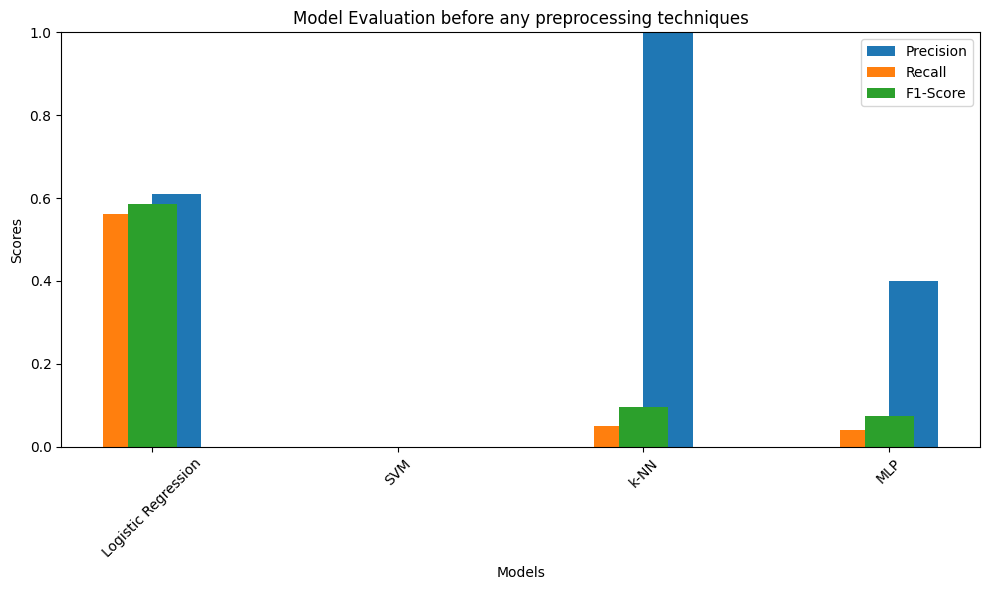

In [69]:
# Evaluation results
models = ['Logistic Regression', 'SVM', 'k-NN', 'MLP']
precision_scores = [precision_score(y_test, lr_pred), precision_score(y_test, svm_pred), precision_score(y_test, knn_pred), precision_score(y_test, mlp_pred)]
recall_scores = [recall_score(y_test, lr_pred), recall_score(y_test, svm_pred), recall_score(y_test, knn_pred), recall_score(y_test, mlp_pred)]
f1_scores = [f1_score(y_test, lr_pred), f1_score(y_test, svm_pred), f1_score(y_test, knn_pred), f1_score(y_test, mlp_pred)]
# Plotting the evaluation metrics
plt.figure(figsize=(10, 6))
plt.bar(models, precision_scores, width=0.2, align='edge', label='Precision')
plt.bar(models, recall_scores, width=-0.2, align='edge', label='Recall')
plt.bar(models, f1_scores, width=-0.2, align='center', label='F1-Score')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Evaluation before any preprocessing techniques')
plt.legend()
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [73]:
rob_scaler = RobustScaler()

In [74]:
#scale the columns
scaled_amount=rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
scaled_time=rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

In [75]:
#replace the amount and time with the scaled ones
df.drop(['Time','Amount'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

In [76]:
#time and amount are scaled now
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [77]:
#evaluate the dataset after scaling data
x=df.drop('Class', axis=1)
y=df['Class']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
# SVM
svm_model =svm.SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
# k-NN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
# MLP
mlp_model =MLPClassifier()
mlp_model.fit(X_train, y_train)
mlp_pred = mlp_model.predict(X_test)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


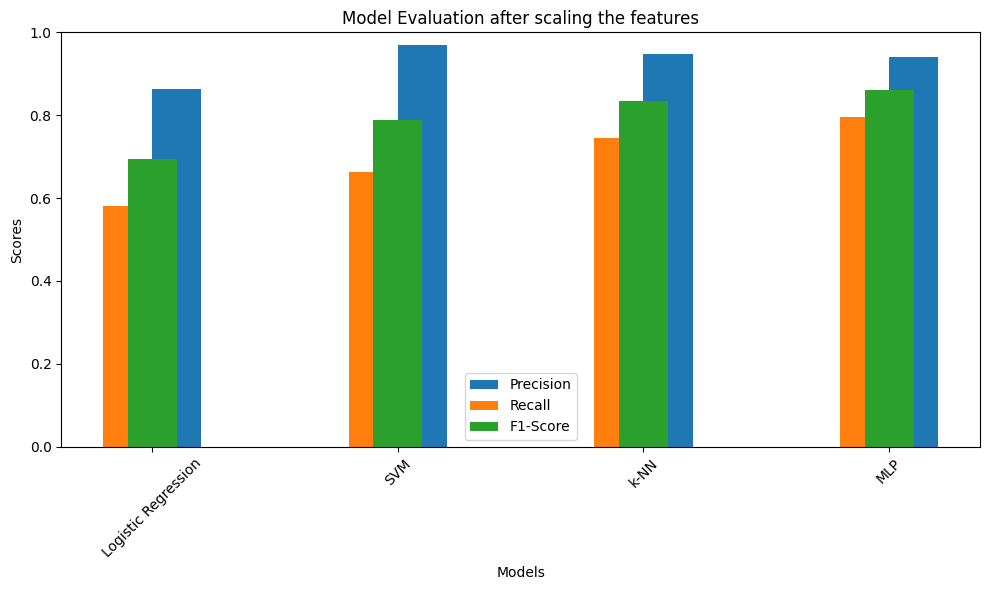

In [79]:
# Evaluation results
models = ['Logistic Regression', 'SVM', 'k-NN', 'MLP']
precision_scores = [precision_score(y_test, lr_pred), precision_score(y_test, svm_pred), precision_score(y_test, knn_pred), precision_score(y_test, mlp_pred)]
recall_scores = [recall_score(y_test, lr_pred), recall_score(y_test, svm_pred), recall_score(y_test, knn_pred), recall_score(y_test, mlp_pred)]
f1_scores = [f1_score(y_test, lr_pred), f1_score(y_test, svm_pred), f1_score(y_test, knn_pred), f1_score(y_test, mlp_pred)]
# Plotting the evaluation metrics
plt.figure(figsize=(10, 6))
plt.bar(models, precision_scores, width=0.2, align='edge', label='Precision')
plt.bar(models, recall_scores, width=-0.2, align='edge', label='Recall')
plt.bar(models, f1_scores, width=-0.2, align='center', label='F1-Score')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Evaluation after scaling the features')
plt.legend()
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [80]:
df_split=df.copy()
#split the datset into features and its label
x = df_split.drop('Class', axis=1)
y = df_split['Class']

In [10]:
#spliting the data using  Stratified K-Fold Cross-Validation
#first we need to find the optimum n_splits
#create a model to evalaute the n_splits value

x = df_split.drop('Class', axis=1)
y = df_split['Class']
model = LogisticRegression()
list_n_splits=[]
max_nsplit=()
for i in range(2,21):

    sfk =StratifiedKFold(n_splits=i, random_state=None, shuffle=False)
    for train_index, test_index in sfk.split(x, y):
        original_Xtrain, original_Xtest = x.iloc[train_index], x.iloc[test_index]
        original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    original_Xtrain = original_Xtrain.values
    original_Xtest = original_Xtest.values
    original_ytrain = original_ytrain.values
    original_ytest = original_ytest.values
    model.fit(original_Xtrain,original_ytrain)
    y_predict=model.predict(original_Xtest)
    f1 = f1_score(original_ytest, y_predict, average='weighted')
    list_n_splits.append((f1,i))

list_n_splits



c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

[(0.9987829077818995, 2),
 (0.9987315068529353, 3),
 (0.9987201822687803, 4),
 (0.9988984504177675, 5),
 (0.9990472623814939, 6),
 (0.9989946800929882, 7),
 (0.9988637681989905, 8),
 (0.998962614735817, 9),
 (0.9988909824045413, 10),
 (0.9987642584142736, 11),
 (0.9989043286595825, 12),
 (0.9988620909700646, 13),
 (0.9989842637436986, 14),
 (0.9989005001879085, 15),
 (0.9988131244603701, 16),
 (0.9988932067411695, 17),
 (0.9988120050470995, 18),
 (0.9987361646803595, 19),
 (0.9987618183127327, 20)]

In [11]:
#the optimum value for k is 6
max(list_n_splits)

(0.9990472623814939, 6)

In [99]:
#final splitting
sfk =StratifiedKFold(n_splits=6, random_state=None, shuffle=False)
for train_index, test_index in sfk.split(x, y):
    original_Xtrain, original_Xtest = x.iloc[train_index], x.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
original_Xtrain1 = original_Xtrain.values
original_Xtest1 = original_Xtest.values
original_ytrain1 = original_ytrain.values
original_ytest1 = original_ytest.values

In [13]:
#using svm to evaluate it 
# Create an SVM classifier object
clf =svm.SVC()
clf.fit(original_Xtrain1, original_ytrain1)
y_predict=clf.predict(original_Xtest1)
f1 = f1_score(original_ytest1, y_predict, average='weighted')
f1

0.999244245746543

In [14]:
#using KNN to evaluate it 
# Create an SVM classifier object
clf =KNeighborsClassifier(n_neighbors=6)
clf.fit(original_Xtrain1, original_ytrain1)
y_predict=clf.predict(original_Xtest1)
f1 = f1_score(original_ytest1, y_predict, average='weighted')
f1

0.999400726614047

In [15]:
#before imbalancing the dataset
model = LogisticRegression()
model.fit(original_Xtrain1,original_ytrain1)
y_predict=model.predict(original_Xtest1)
f1 = f1_score(original_ytest1, y_predict, average='weighted')
f1

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9990472623814939

In [100]:
#build the training dataset 
training_data = pd.concat([original_Xtrain, original_ytrain], axis=1)


In [101]:
# Separate the majority and minority classes

majority_class = training_data[training_data['Class'] == 0]
minority_class = training_data[training_data['Class'] == 1]


In [102]:
# Undersample the majority class
undersampled_majority = majority_class.sample(n=len(minority_class), random_state=42)

# Combine the minority class with the undersampled majority class
undersampled_data = pd.concat([undersampled_majority, minority_class])
# Shuffle the undersampled data
undersampled_data = undersampled_data.sample(frac=1, random_state=42)


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


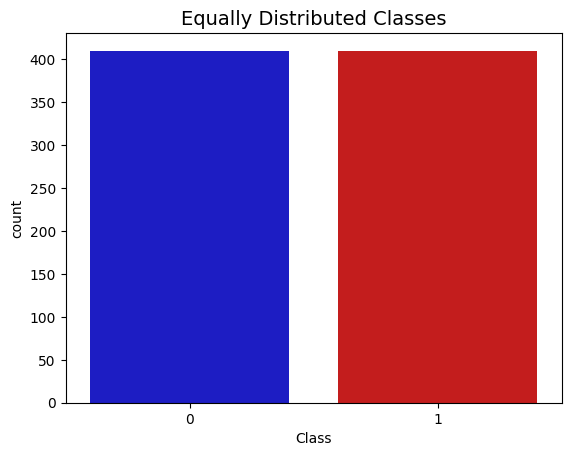

In [103]:
print('Distribution of the Classes in the subsample dataset')
print(undersampled_data['Class'].value_counts()/len(undersampled_data))
colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=undersampled_data, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [104]:
# Separate the features and target variable for the undersampled data
X_train_undersampled = undersampled_data.drop('Class', axis=1)
y_train_undersampled = undersampled_data['Class']

c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


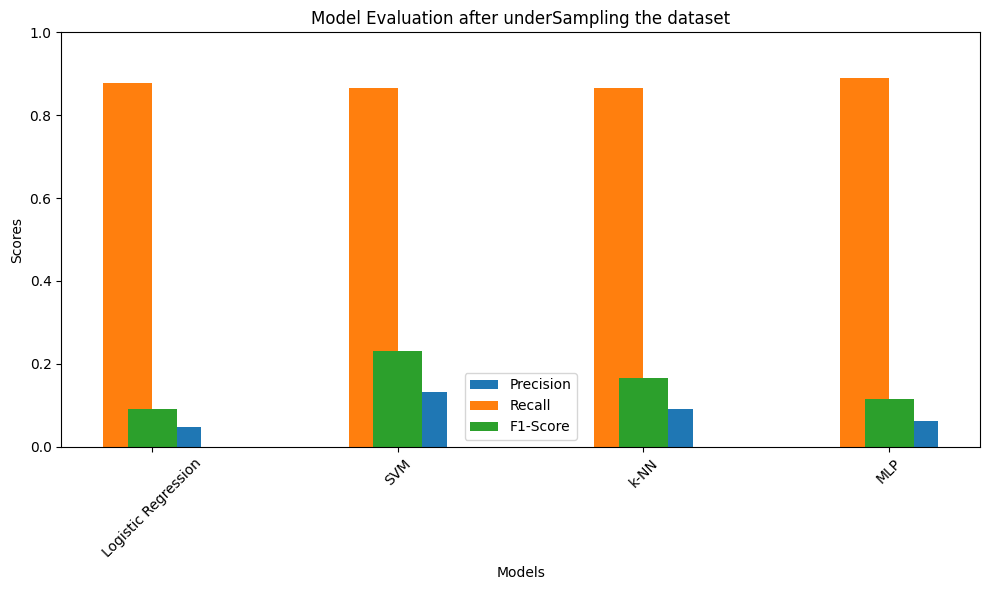

In [105]:
X_train, y_train=X_train_undersampled,y_train_undersampled
X_test,y_test=original_Xtest,original_ytest

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
# SVM
svm_model =svm.SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
# k-NN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
# MLP
mlp_model =MLPClassifier()
mlp_model.fit(X_train, y_train)
mlp_pred = mlp_model.predict(X_test)
# Evaluation results
models = ['Logistic Regression', 'SVM', 'k-NN', 'MLP']
precision_scores = [precision_score(y_test, lr_pred), precision_score(y_test, svm_pred), precision_score(y_test, knn_pred), precision_score(y_test, mlp_pred)]
recall_scores = [recall_score(y_test, lr_pred), recall_score(y_test, svm_pred), recall_score(y_test, knn_pred), recall_score(y_test, mlp_pred)]
f1_scores = [f1_score(y_test, lr_pred), f1_score(y_test, svm_pred), f1_score(y_test, knn_pred), f1_score(y_test, mlp_pred)]
# Plotting the evaluation metrics
plt.figure(figsize=(10, 6))
plt.bar(models, precision_scores, width=0.2, align='edge', label='Precision')
plt.bar(models, recall_scores, width=-0.2, align='edge', label='Recall')
plt.bar(models, f1_scores, width=-0.2, align='center', label='F1-Score')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Evaluation after underSampling the dataset')
plt.legend()
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [107]:
#for oversampling
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(original_Xtrain,original_ytrain)

Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


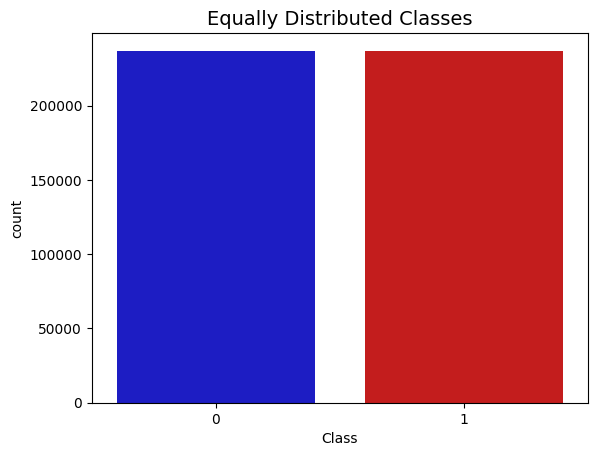

In [108]:
print('Distribution of the Classes in the subsample dataset')
oversampling_data=pd.concat([X_train_oversampled,y_train_oversampled],axis=1)
print(oversampling_data['Class'].value_counts()/len(oversampling_data))
colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=oversampling_data, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

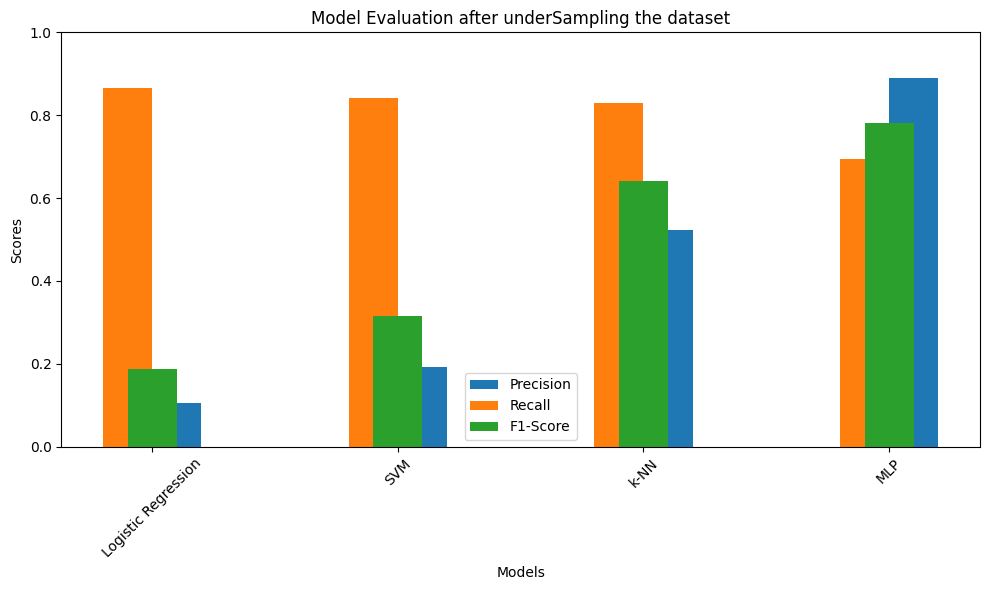

In [110]:
X_train, y_train=X_train_oversampled,y_train_oversampled
X_test,y_test=original_Xtest,original_ytest

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
# SVM
svm_model =svm.SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
# k-NN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
# MLP
mlp_model =MLPClassifier()
mlp_model.fit(X_train, y_train)
mlp_pred = mlp_model.predict(X_test)
# Evaluation results
models = ['Logistic Regression', 'SVM', 'k-NN', 'MLP']
precision_scores = [precision_score(y_test, lr_pred), precision_score(y_test, svm_pred), precision_score(y_test, knn_pred), precision_score(y_test, mlp_pred)]
recall_scores = [recall_score(y_test, lr_pred), recall_score(y_test, svm_pred), recall_score(y_test, knn_pred), recall_score(y_test, mlp_pred)]
f1_scores = [f1_score(y_test, lr_pred), f1_score(y_test, svm_pred), f1_score(y_test, knn_pred), f1_score(y_test, mlp_pred)]
# Plotting the evaluation metrics
plt.figure(figsize=(10, 6))
plt.bar(models, precision_scores, width=0.2, align='edge', label='Precision')
plt.bar(models, recall_scores, width=-0.2, align='edge', label='Recall')
plt.bar(models, f1_scores, width=-0.2, align='center', label='F1-Score')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Evaluation after oversampling the dataset')
plt.legend()
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

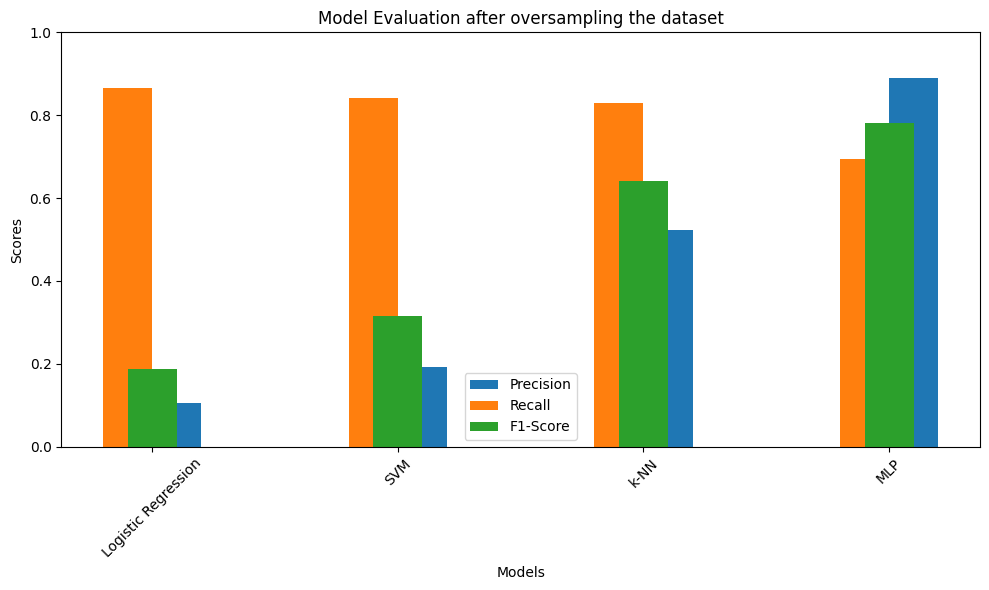

In [111]:
plt.figure(figsize=(10, 6))
plt.bar(models, precision_scores, width=0.2, align='edge', label='Precision')
plt.bar(models, recall_scores, width=-0.2, align='edge', label='Recall')
plt.bar(models, f1_scores, width=-0.2, align='center', label='F1-Score')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Evaluation after oversampling the dataset')
plt.legend()
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [26]:
model.fit(X_train_oversampled,y_train_oversampled)
y_predict=model.predict(original_Xtest)
f1 = f1_score(original_ytest, y_predict, average='weighted')
f1

0.9920775601783826

In [27]:
#using svm to evaluate it 
# Create an SVM classifier object
clf =KNeighborsClassifier(n_neighbors=6)
clf.fit(X_train_oversampled, y_train_oversampled)
y_predict=clf.predict(original_Xtest)
f1 = f1_score(original_ytest, y_predict, average='weighted')
f1

0.9985955395049904

In [28]:
#using svm to evaluate it 
# Create an SVM classifier object
#clf =svm.SVC()
#clf.fit(X_train_oversampled, y_train_oversampled)
#y_predict=clf.predict(original_Xtest)
#f1 = f1_score(original_ytest, y_predict, average='weighted')
#f1

In [112]:
#in this section we will use combinarion of under/oversampling
# Apply combination of oversampling and undersampling techniques to the training data
oversampler = SMOTE(sampling_strategy=0.5, random_state=42)
undersampler = RandomUnderSampler(sampling_strategy=1.0, random_state=42)

X_train_combined, y_train_combined = oversampler.fit_resample(original_Xtrain, original_ytrain)
X_train_combined, y_train_combined = undersampler.fit_resample(X_train_combined, y_train_combined)



Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


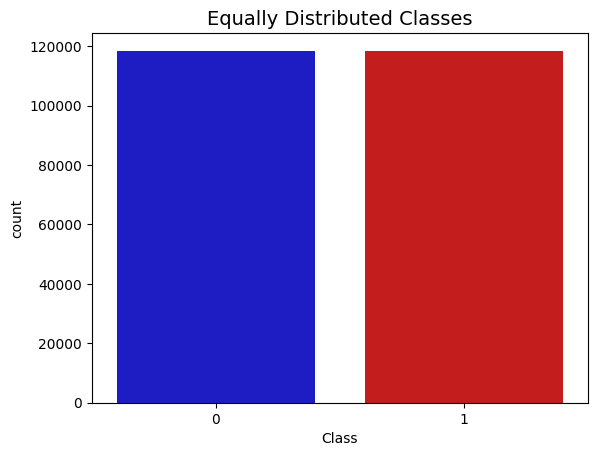

In [113]:
print('Distribution of the Classes in the subsample dataset')
combined_data=pd.concat([X_train_combined,y_train_combined],axis=1)
print(combined_data['Class'].value_counts()/len(combined_data))
colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=combined_data, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [32]:
model.fit(X_train_combined,y_train_combined)
y_predict=model.predict(original_Xtest)
f1 = f1_score(original_ytest, y_predict, average='weighted')
f1

0.9921885787045871

In [33]:
#using svm to evaluate it 
from sklearn.neighbors import KNeighborsClassifier
# Create an SVM classifier object
clf =KNeighborsClassifier(n_neighbors=6)
clf.fit(X_train_combined,y_train_combined)
y_predict=clf.predict(original_Xtest)
f1 = f1_score(original_ytest, y_predict, average='weighted')
f1

0.9978468639141103

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train an SVM classifier
svm_model =svm.SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

print("F1 score: ", f1)

F1 score:  0.7878787878787878


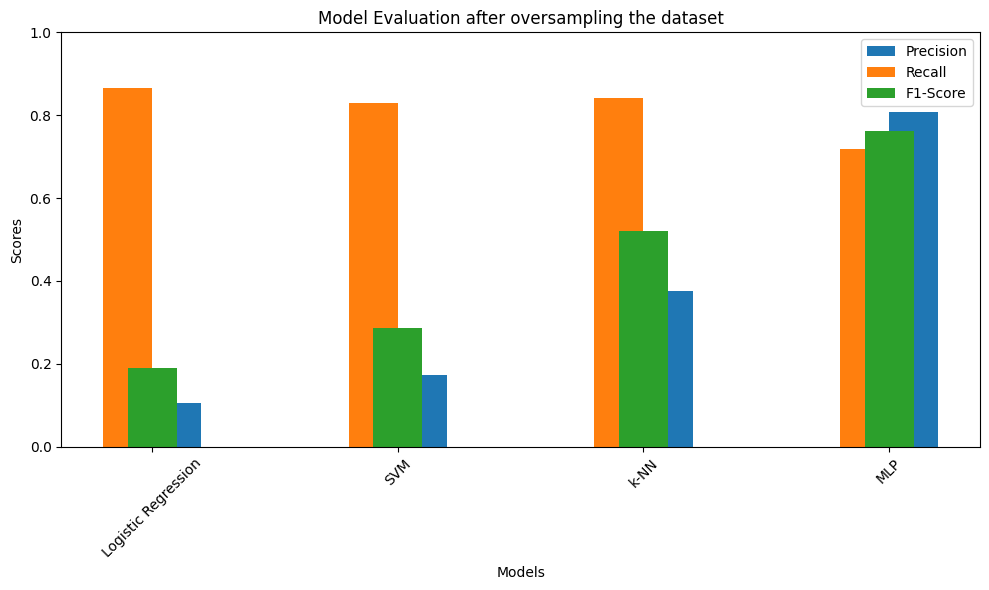

In [114]:
X_train, y_train=X_train_combined,y_train_combined
X_test,y_test=original_Xtest,original_ytest

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
# SVM
svm_model =svm.SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
# k-NN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
# MLP
mlp_model =MLPClassifier()
mlp_model.fit(X_train, y_train)
mlp_pred = mlp_model.predict(X_test)
# Evaluation results
models = ['Logistic Regression', 'SVM', 'k-NN', 'MLP']
precision_scores = [precision_score(y_test, lr_pred), precision_score(y_test, svm_pred), precision_score(y_test, knn_pred), precision_score(y_test, mlp_pred)]
recall_scores = [recall_score(y_test, lr_pred), recall_score(y_test, svm_pred), recall_score(y_test, knn_pred), recall_score(y_test, mlp_pred)]
f1_scores = [f1_score(y_test, lr_pred), f1_score(y_test, svm_pred), f1_score(y_test, knn_pred), f1_score(y_test, mlp_pred)]
# Plotting the evaluation metrics
plt.figure(figsize=(10, 6))
plt.bar(models, precision_scores, width=0.2, align='edge', label='Precision')
plt.bar(models, recall_scores, width=-0.2, align='edge', label='Recall')
plt.bar(models, f1_scores, width=-0.2, align='center', label='F1-Score')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Evaluation after oversampling the dataset')
plt.legend()
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()